CPU times: total: 1min 20s
Wall time: 1min 20s
CPU times: total: 14.2 s
Wall time: 14.3 s
CPU times: total: 453 ms
Wall time: 455 ms


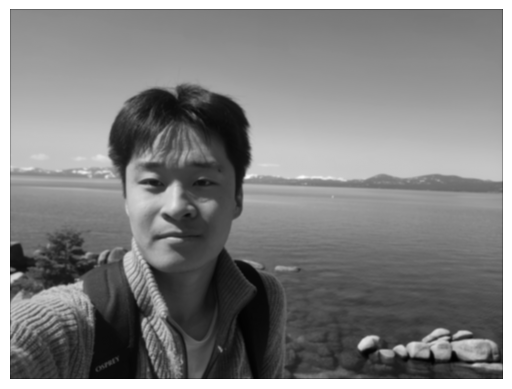

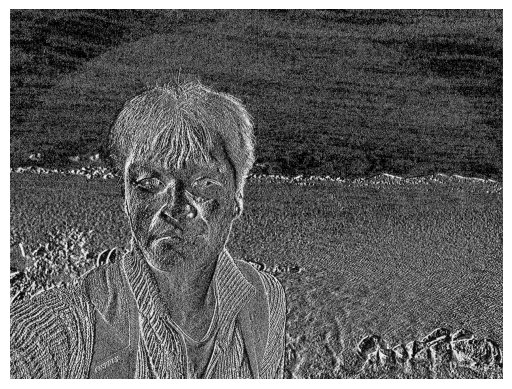

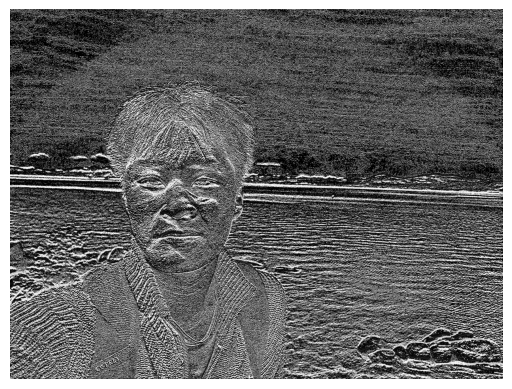

In [5]:
from scipy.signal import convolve2d
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
from utils import show_image

D_x = np.array([[1, 0, -1]])
D_y = np.array([[1], [0], [-1]])

def conv_4loops(im, kernel):
    pad_h, pad_w = kernel.shape[0] // 2, kernel.shape[1] // 2
    padded_im = np.pad(im, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    out = np.zeros_like(im)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            val = 0
            for di in range(-pad_h, pad_h + 1):
                for dj in range(-pad_w, pad_w + 1):
                    val += padded_im[i + pad_h + di, j + pad_w + dj] * kernel[di + pad_h, dj + pad_w]
            out[i, j] = val
    return out


def conv_2loops(im, kernel):
    pad_h, pad_w = kernel.shape[0] // 2, kernel.shape[1] // 2
    padded_im = np.pad(im, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    out = np.zeros_like(im)

    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            out[i, j] = np.sum(padded_im[i:i + 2 * pad_h + 1, j:j + 2 * pad_w + 1] * kernel)
    return out

im = sk.img_as_float(skio.imread('data/yifan_tahoe.jpg', as_gray=True))
box_filter = np.ones((9, 9)) / 81
# runtime comparison:
%time conv_4loops(im, box_filter)
%time conv_2loops(im, box_filter)
%time convolve2d(im, box_filter, mode='same', boundary='symm')

im_2loops = conv_2loops(im, box_filter)
show_image(im_2loops, filename='out/part1_boxfilter_2loops.jpg')

im_dx_2loops = conv_2loops(im, D_x)
im_dy_2loops = conv_2loops(im, D_y)
show_image(im_dx_2loops, filename='out/part1_dx_2loops.jpg')
show_image(im_dy_2loops, filename='out/part1_dy_2loops.jpg')

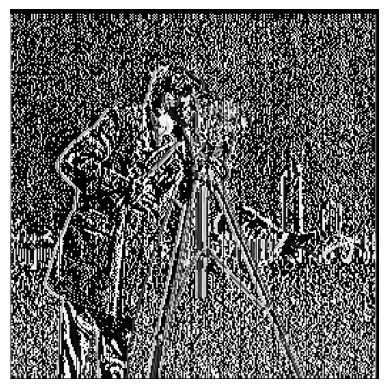

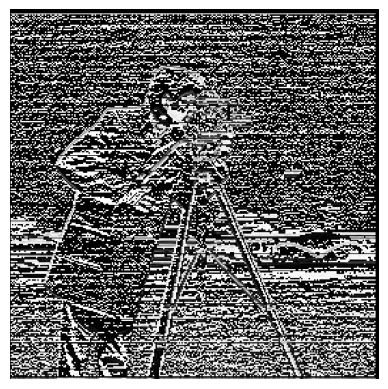

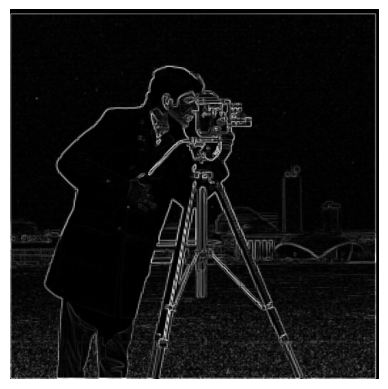

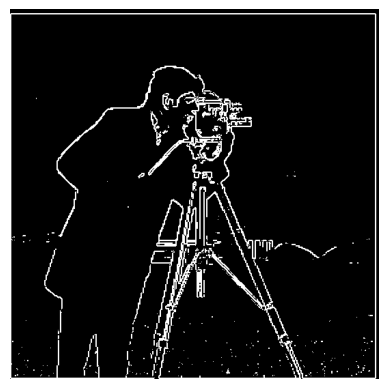

In [6]:
cameraman = skio.imread('data/cameraman.png', as_gray=True)
cameraman = sk.img_as_float(cameraman)

Ix = convolve2d(cameraman, D_x, mode='same', boundary='symm')
Iy = convolve2d(cameraman, D_y, mode='same', boundary='symm')

show_image(Ix, filename='out/cameraman_Ix.png')
show_image(Iy, filename='out/cameraman_Iy.png')

cameraman_grad = np.sqrt(Ix**2 + Iy**2)

skio.imsave('out/cameraman_grad.png', (cameraman_grad * 255).astype(np.uint8))
plt.axis('off')
plt.imshow(cameraman_grad, cmap='gray')
plt.show()

threshold = 0.25
cameraman_edge = (cameraman_grad > threshold).astype(float)
skio.imsave('out/cameraman_edge.png', (cameraman_edge * 255).astype(np.uint8))
plt.axis('off')
plt.imshow(cameraman_edge, cmap='gray')

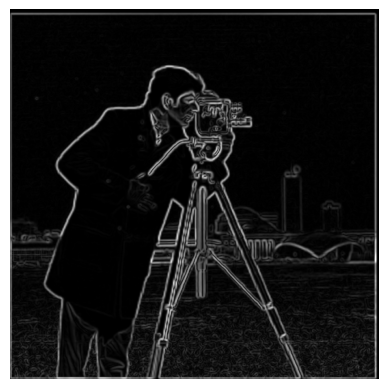

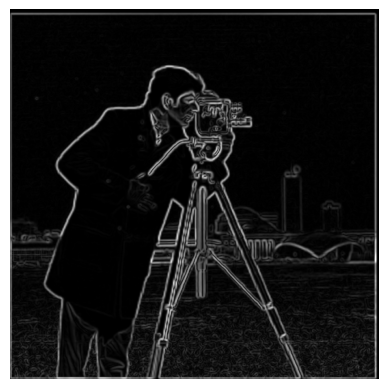

In [7]:
import cv2
gaussian_1d = cv2.getGaussianKernel(ksize=5, sigma=1)
G = np.outer(gaussian_1d, gaussian_1d)

cameraman_blur = convolve2d(cameraman, G, mode='same', boundary='symm')
Ix_blur = convolve2d(cameraman_blur, D_x, mode='same', boundary='symm')
Iy_blur = convolve2d(cameraman_blur, D_y, mode='same', boundary='symm')
cameraman_blur_grad = np.sqrt(Ix_blur**2 + Iy_blur**2)

skio.imsave('out/cameraman_blur_grad.png', (cameraman_blur_grad * 255).astype(np.uint8))
plt.axis('off')
plt.imshow(cameraman_blur_grad, cmap='gray')
plt.show()

DoG_x = convolve2d(G, D_x, mode='full')
DoG_y = convolve2d(G, D_y, mode='full')
Ix_DoG = convolve2d(cameraman, DoG_x, mode='same', boundary='symm')
Iy_DoG = convolve2d(cameraman, DoG_y, mode='same', boundary='symm')
camerman_DoG = np.sqrt(Ix_DoG**2 + Iy_DoG**2)

skio.imsave('out/cameraman_DoG.png', (camerman_DoG * 255).astype(np.uint8))
plt.axis('off')
plt.imshow(camerman_DoG, cmap='gray')
plt.show()

assert np.allclose(cameraman_blur_grad, camerman_DoG)